In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/jordi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the data

In [2]:
data = pd.read_csv("../data/autoinsurance_churn_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041065 entries, 0 to 1041064
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   curr_ann_amt         1041065 non-null  float64
 1   days_tenure          1041065 non-null  float64
 2   cust_orig_date       1041065 non-null  object 
 3   age_in_years         1041065 non-null  int64  
 4   date_of_birth        1041065 non-null  object 
 5   city                 1041065 non-null  object 
 6   county               1041065 non-null  object 
 7   income               1041065 non-null  float64
 8   has_children         1041065 non-null  float64
 9   length_of_residence  1041065 non-null  float64
 10  marital_status       1041065 non-null  object 
 11  home_market_value    1041065 non-null  object 
 12  home_owner           1041065 non-null  float64
 13  college_degree       1041065 non-null  float64
 14  good_credit          1041065 non-null  float64
 15

### Marginal distributions

In [3]:
num_vars = ["curr_ann_amt", "age_in_years",
            "days_tenure",
            "income", "length_of_residence"]
cat_vars_num = ["has_children", "home_owner", "college_degree",
                "good_credit", "Churn"]
cat_other = [var for var in data.columns if var not in num_vars + cat_vars_num]

In [4]:
images_directory = "../images/"

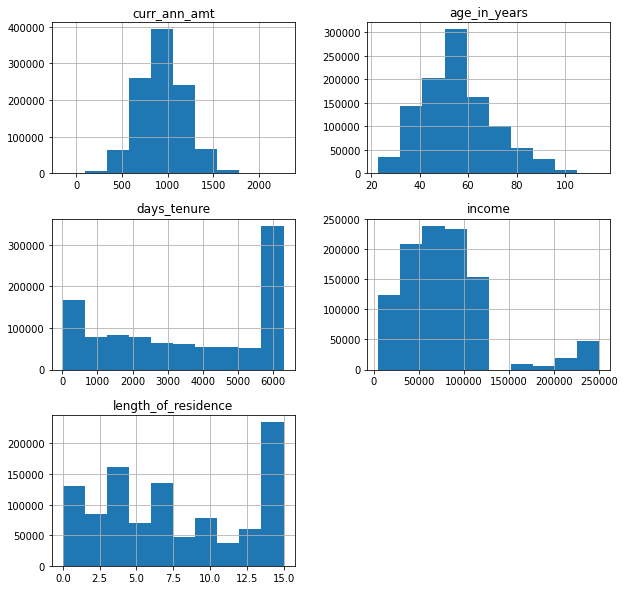

In [5]:
data[num_vars].hist(figsize=(10, 10));
plt.savefig(images_directory+"num_vars.png")

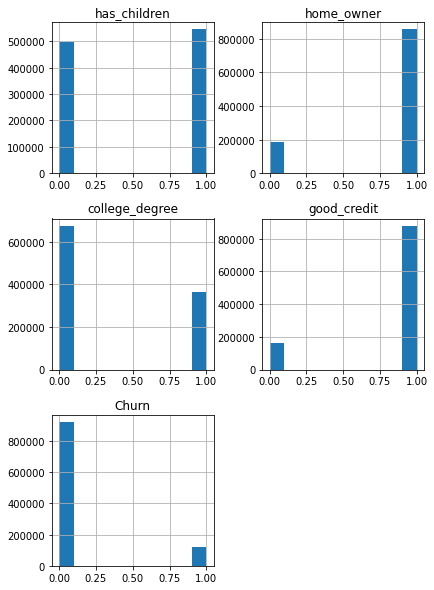

In [6]:
data[cat_vars_num].hist(figsize=(6.67, 10));
plt.savefig(images_directory+"cat_vars_num.png")

/tmp/ipykernel_7720/3025359121.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


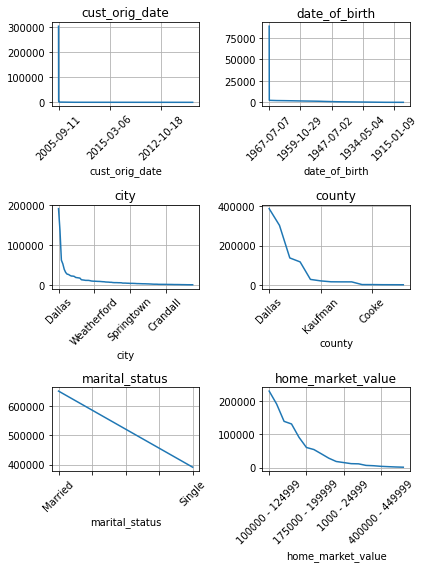

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(6, 8))
axes = axes.flatten()
i=0
for i, var in enumerate(cat_other):
    data[var].value_counts().plot(ax=axes[i])
    axes[i].set_title(var)
    axes[i].grid(visible=True)
    axes[i].tick_params(axis='x', labelrotation=45)


fig.tight_layout()

fig.show()
fig.savefig(images_directory+"cat_vars_other.png")

### Correlations

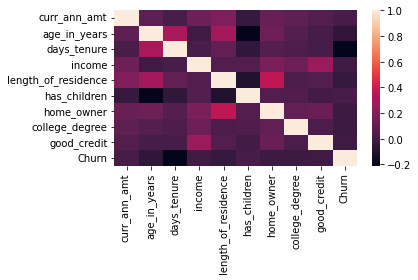

In [10]:
sns.heatmap(data[num_vars+cat_vars_num].corr())
plt.tight_layout()
plt.savefig(images_directory+"correlations.png")